## Part 2: Scikit-learn Pipelines, Feature Scaling, Missing Data Imputation, Machine Learning Algorithms, Performance Evaluation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import numpy as np

In [4]:
# Import the ML dataset
final_merg_ml = pd.read_csv("final_ML_NH_data.csv")

In [20]:
final_merg_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11585 entries, 0 to 11584
Data columns (total 57 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Count of Freedom from Abuse and Neglect and Exploitation Deficiencies                                        11585 non-null  int64  
 1   Count of Quality of Life and Care Deficiencies                                                               11585 non-null  int64  
 2   Count of Resident Assessment and Care Planning Deficiencies                                                  11585 non-null  int64  
 3   Count of Nursing and Physician Services Deficiencies                                                         11585 non-null  int64  
 4   Count of Resident Rights Deficiencies                     

### **Process:**
1. Split the dataset into training and test sets.
2. Perform a GridSearchCV on the training set, and the main params to GridSearchCV are the pipeline and param_grid.
3. Evaluate the best model(s) on the test set.

##### We will need Multi-Class Logistic Regression for one of the  classifiers. How to define the multinomial logistic regression model:
```python
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
```

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
# Default: imputer = KNNImputer(n_neighbors=5, weights="uniform")
from sklearn.feature_selection import SelectKBest

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

#dummy_clf = DummyClassifier(strategy="most_frequent")


# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

"We set a random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset."

##### 
```python
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
```

#### Train | Test Split

In [5]:
final_merg_ml.columns

Index(['Count of Freedom from Abuse and Neglect and Exploitation Deficiencies',
       'Count of Quality of Life and Care Deficiencies',
       'Count of Resident Assessment and Care Planning Deficiencies',
       'Count of Nursing and Physician Services Deficiencies',
       'Count of Resident Rights Deficiencies',
       'Count of Nutrition and Dietary Deficiencies',
       'Count of Pharmacy Service Deficiencies',
       'Count of Environmental Deficiencies',
       'Count of Administration Deficiencies',
       'Count of Infection Control Deficiencies', 'Count of Code B',
       'Count of Code C', 'Count of Code D', 'Count of Code E',
       'Count of Code F', 'Count of Code G', 'Count of Code H',
       'Count of Code I', 'Count of Code J', 'Count of Code K',
       'Count of Code L', 'Overall Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day'

In [6]:
X = final_merg_ml.drop(columns="Overall Rating")  # features
y = final_merg_ml["Overall Rating"]  # target variable

In [7]:
X

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
0,0,0,0,0,1,0,0,0,0,2,...,0.540540,70.000000,97.761194,88.878719,0.000000,98.159509,0.888825,0.298808,2.159487,19.653524
1,0,2,3,1,1,2,0,1,0,2,...,4.780875,42.028986,90.526314,66.674368,0.000000,94.545455,2.226671,0.894101,10.762260,16.512389
2,0,1,0,0,1,5,1,1,0,2,...,10.526318,68.965516,88.745983,72.120704,0.921659,91.036415,0.596624,0.970204,16.144221,18.882362
3,0,2,3,2,1,2,0,0,0,0,...,3.886926,34.444446,99.459460,60.537590,1.219512,100.000000,2.420352,0.593651,6.027909,17.828036
4,1,2,4,0,1,1,1,1,0,1,...,3.726709,42.253520,84.307689,85.980985,2.058319,70.124481,0.865714,1.009416,15.817361,23.075948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11580,1,1,1,0,1,0,1,0,0,0,...,1.242238,76.190476,74.340528,61.334285,2.551022,57.303371,0.808119,0.437953,10.114813,20.561425
11581,0,0,0,0,0,0,0,0,0,0,...,2.105262,39.473684,97.204967,44.250234,1.744186,92.957746,0.456383,0.090478,4.962855,25.352158
11582,0,1,1,0,0,0,0,0,1,0,...,7.142859,54.545456,32.171584,59.228745,1.219514,33.333333,1.031751,0.196203,10.695237,17.054941
11583,0,0,0,0,0,0,0,0,0,0,...,1.452785,72.897197,98.919754,82.825190,1.428573,89.670659,1.404439,0.406249,3.347344,25.318875


In [9]:
y.to_frame(name="Overall Rating")

,Overall Rating
0,5
1,4
2,1
3,3
4,2
...,...
11580,3
11581,4
11582,4
11583,5


In [10]:
from sklearn.model_selection import train_test_split

# 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)    # stratified split

In [12]:
# Number of instances in training set
len(X_train)

8109

In [13]:
# Number of instances in test set
len(X_test)

3476

In [11]:
# Distribution of class labels (to verify that it is indeed a stratified train-test split)
print('\nLabels counts in y:', y.value_counts(), sep="\n")
print('\nLabels counts in y_train:', y_train.value_counts(), sep="\n")
print('\nLabels counts in y_test:', y_test.value_counts(), sep="\n")


Labels counts in y:
4    2520
2    2421
5    2410
3    2283
1    1951
Name: Overall Rating, dtype: int64

Labels counts in y_train:
4    1764
2    1694
5    1687
3    1598
1    1366
Name: Overall Rating, dtype: int64

Labels counts in y_test:
4    756
2    727
5    723
3    685
1    585
Name: Overall Rating, dtype: int64


In [15]:
train_subset = pd.concat([X_train, y_train], axis=1)
train_subset.shape

(8109, 57)

In [14]:
test_subset = pd.concat([X_test, y_test], axis=1)
test_subset.shape

(3476, 57)

In [16]:
# Saving these DataFrames into separate files

test_subset.to_csv("test_set.csv", index=False)
train_subset.to_csv("train_set.csv", index=False)

### Pipelines and Classifiers

In [18]:
import sklearn
print(sklearn.__version__)

0.23.2


In [25]:
X_train

,Count of Freedom from Abuse and Neglect and Exploitation Deficiencies,Count of Quality of Life and Care Deficiencies,Count of Resident Assessment and Care Planning Deficiencies,Count of Nursing and Physician Services Deficiencies,Count of Resident Rights Deficiencies,Count of Nutrition and Dietary Deficiencies,Count of Pharmacy Service Deficiencies,Count of Environmental Deficiencies,Count of Administration Deficiencies,Count of Infection Control Deficiencies,...,Percentage of long-stay residents with a urinary tract infection,Percentage of low risk long-stay residents who lose control of their bowels or bladder,Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short-stay residents who made improvements in function,Percentage of short-stay residents who newly received an antipsychotic medication,Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Percentage of short-stay residents who had an outpatient emergency department visit,Percentage of short-stay residents who were rehospitalized after a nursing home admission
4130,0,1,0,0,1,2,1,0,0,1,...,1.052631,34.615385,81.159420,69.394412,0.000000,89.102564,0.231036,0.000000,6.421170,8.657921
51,0,0,1,0,2,3,1,1,0,1,...,3.597121,64.615385,89.825119,76.016732,4.545455,86.440678,0.941601,0.781637,12.176117,22.590423
1881,0,4,1,0,1,1,2,1,0,0,...,2.970297,82.068964,94.050634,67.802614,1.256731,91.065662,1.205438,0.404881,12.549085,33.949751
2137,0,2,1,0,0,0,1,1,0,2,...,0.840336,31.884059,83.163264,69.121584,3.323261,83.816014,0.751592,0.422543,13.587019,27.444844
2001,0,2,0,0,0,1,0,0,0,0,...,1.250000,42.857142,88.971964,78.532906,2.228826,66.013072,1.174859,0.418354,9.387500,26.990531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,1,3,4,1,1,2,1,1,3,2,...,1.739129,67.500000,91.242937,83.062088,0.448430,93.831169,0.884150,0.489789,5.408454,20.251436
6254,0,4,4,1,0,2,6,0,0,2,...,0.296737,59.999999,30.679159,73.294519,2.000001,39.891697,1.299972,0.581482,5.853244,22.650920
3527,1,6,4,1,2,1,0,0,0,3,...,0.487806,51.351352,81.825275,73.245415,0.682592,73.299195,1.713628,0.760502,18.088236,25.689974
3817,0,6,1,0,0,1,1,0,0,0,...,6.250000,55.782311,89.010987,80.838100,0.000000,92.682927,1.585988,0.383900,6.129064,15.245716


In [26]:
y_train

4130    5
51      4
1881    2
2137    4
2001    4
       ..
3788    2
6254    3
3527    2
3817    4
6174    5
Name: Overall Rating, Length: 8109, dtype: int64

In [27]:
# 10 folds/splits
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [22]:
from sklearn.model_selection import cross_val_score

In [28]:
# Dummy classfier (our baseline)
dummy_clf = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy_clf, X_train, y_train, cv=cv, scoring='accuracy')

In [74]:
print("%0.5f classification accuracy" % scores.mean())

0.21754 classification accuracy


We expected this accuracy value as the majority class (overall rating 4) contains 1764 instances out of 8109 in training set.

*Each of our four Pipeline objects will:*

Standardize the data using **StandardScaler**; For missing values, perform nearest neighbor imputaton with **KNNImputer**; Select the k best features from the data using **SelectKBest** (where k is a hyperparameter to be tuned via GridSearchCV); then, Use a **classifier** to model the data.

In [37]:
# Our features are all numeric, so we do not need to do any one-hot encoding.

# Classifier: kNN
pipe_knn = Pipeline([('scaler', StandardScaler()),
                    ('imputer', KNNImputer()),
                    ('selector', SelectKBest()),
                    ('classifier', KNeighborsClassifier())])

# Classifier: multi-class Logistic Regression
pipe_lr = Pipeline([('scaler', StandardScaler()),
                    ('imputer', KNNImputer()),
                    ('selector', SelectKBest()),
                    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

# Classifier: Random Forest
pipe_rf = Pipeline([('scaler', StandardScaler()),
                    ('imputer', KNNImputer()),
                    ('selector', SelectKBest()),
                    ('classifier', RandomForestClassifier())])

# Classifier: AdaBoost
pipe_ada = Pipeline([('scaler', StandardScaler()),
                    ('imputer', KNNImputer()),
                    ('selector', SelectKBest()),
                    ('classifier', AdaBoostClassifier())])

In [130]:
# HTML diagram of the pipelines
from sklearn import set_config

set_config(display='diagram')

In [111]:
pipe_ada

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest()),
                ('classifier', AdaBoostClassifier())])

In [118]:
pipe_knn

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest()),
                ('classifier', KNeighborsClassifier())])

In [119]:
pipe_rf

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest()),
                ('classifier', RandomForestClassifier())])

In [120]:
pipe_lr

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest()),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [ ]:
param_grid = {'selector__k': [10, 15, 20, 25]}

##### Construct grid searches

In [35]:
# GridSearchCV performs k-fold cross-validation
# 10-fold stratified Cross-validation

In [39]:
# cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# kNN
search_knn = GridSearchCV(pipe_knn, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
result_knn = search_knn.fit(X_train, y_train)

# Log. Reg.
search_lr = GridSearchCV(pipe_lr, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
result_lr = search_lr.fit(X_train, y_train)

# Random forest
search_rf = GridSearchCV(pipe_rf, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
result_rf = search_rf.fit(X_train, y_train)

# AdaBoost
search_ada = GridSearchCV(pipe_ada, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
result_ada = search_ada.fit(X_train, y_train)

In [40]:
train_performances = [[result_knn.best_score_, result_lr.best_score_, result_rf.best_score_, result_ada.best_score_]]
pd.DataFrame(train_performances, columns=["kNN", "LogisticRegression", "RandomForest", "AdaBoost"])

,kNN,LogisticRegression,RandomForest,AdaBoost
0,0.42348,0.476384,0.474041,0.456528


These classification accuracies are better than the baseline of 0.2175! Thus, it indicates that the ML models did learn some patterns from the training data.

In [47]:
# summarize (kNN)
print('Best Estimator: %s' % result_knn.best_estimator_)
print('Best Score: %s' % result_knn.best_score_)
print('Best Hyperparameters: %s' % result_knn.best_params_)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest(k=25)),
                ('classifier', KNeighborsClassifier())])
Best Score: 0.4234802332130734
Best Hyperparameters: {'selector__k': 25}


In [48]:
# summarize (Logistic regression)
print('Best Estimator: %s' % result_lr.best_estimator_)
print('Best Score: %s' % result_lr.best_score_)
print('Best Hyperparameters: %s' % result_lr.best_params_)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest(k=25)),
                ('classifier', LogisticRegression(multi_class='multinomial'))])
Best Score: 0.4763835228570124
Best Hyperparameters: {'selector__k': 25}


In [49]:
# summarize (Random Forest)
print('Best Estimator: %s' % result_rf.best_estimator_)
print('Best Score: %s' % result_rf.best_score_)
print('Best Hyperparameters: %s' % result_rf.best_params_)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest(k=25)),
                ('classifier', RandomForestClassifier())])
Best Score: 0.47404073617390513
Best Hyperparameters: {'selector__k': 25}


In [50]:
# summarize (AdaBoost)
print('Best Estimator: %s' % result_ada.best_estimator_)
print('Best Score: %s' % result_ada.best_score_)
print('Best Hyperparameters: %s' % result_ada.best_params_)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('selector', SelectKBest(k=25)),
                ('classifier', AdaBoostClassifier())])
Best Score: 0.45652783486322324
Best Hyperparameters: {'selector__k': 25}


In [85]:
# Get to the steps in a pipeline to access the SelectKBest object and find what 25 features it selected

feat_names_25 = X_train.columns[result_knn.best_estimator_.named_steps['selector'].get_support()]
feat_names_25

Index(['Count of Quality of Life and Care Deficiencies',
       'Count of Resident Assessment and Care Planning Deficiencies',
       'Count of Nursing and Physician Services Deficiencies',
       'Count of Resident Rights Deficiencies',
       'Count of Nutrition and Dietary Deficiencies',
       'Count of Pharmacy Service Deficiencies',
       'Count of Administration Deficiencies',
       'Count of Infection Control Deficiencies', 'Count of Code D',
       'Count of Code E', 'Count of Code F', 'Count of Code G',
       'Count of Code J',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Total nursing staff turnover', 'Registered Nurse turnover',
       'Total Health Revisits', 'Number of Substantiated Complaints',
       'Number of Citations from Infection

In [67]:
# 25 features
len(X_train.columns[result_knn.best_estimator_.named_steps['selector'].get_support()])

25

### Feature importances
#### (Relative importance of each feature)
By looking at the feature importances for each model, we can find out which features in our dataset have the most impact on a model's predictions for the class label (i.e., the overall rating). It helps answer the question: *Which features are most important for predicting the class label?*

In [51]:
# perform permutation importance for kNN in order to calculate feature importances
from sklearn.inspection import permutation_importance

results_imp = permutation_importance(result_knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results_imp.importances_mean
importance

array([ 6.41262794e-04,  1.64261931e-02,  1.36884943e-02,  9.76692564e-03,
        1.24799605e-02,  1.49956838e-02,  1.04328524e-02, -5.91934887e-04,
        1.29485757e-02,  1.26526082e-02,  2.95967444e-04,  1.52916513e-03,
        8.26242447e-03,  1.46750524e-02,  9.22431866e-03,  1.45763966e-02,
        4.44089210e-17,  0.00000000e+00,  3.26057467e-02,  1.47983722e-04,
        4.68615119e-04,  1.13454187e-02,  1.70181280e-03,  2.16056234e-02,
        1.27019361e-02,  1.83006536e-02,  3.94623258e-04,  1.11481070e-02,
        9.59427796e-03, -1.47983722e-04,  1.74620792e-02, -4.93279073e-05,
        1.41077815e-02,  1.26279443e-02,  1.01122210e-03,  6.90590702e-04,
       -1.72647675e-04, -1.47983722e-04,  6.90590702e-04,  1.23319768e-04,
        9.37230238e-04, -4.68615119e-04, -4.93279073e-05, -9.61894192e-04,
        3.08052781e-02,  1.97311629e-04,  8.38574423e-04,  7.89246516e-04,
        1.36638303e-02,  1.72647675e-04,  1.45517326e-03,  1.30965594e-02,
       -3.20631397e-04,  

In [93]:
df_res = pd.concat([pd.DataFrame(X_train.columns, columns=["Name"]), pd.DataFrame(np.round(importance, 8), columns=["Feature Importance"])], axis=1)
df_res

,Name,Feature Importance
0,Count of Freedom from Abuse and Neglect and Ex...,0.000641
1,Count of Quality of Life and Care Deficiencies,0.016426
2,Count of Resident Assessment and Care Planning...,0.013688
3,Count of Nursing and Physician Services Defici...,0.009767
4,Count of Resident Rights Deficiencies,0.012480
5,Count of Nutrition and Dietary Deficiencies,0.014996
6,Count of Pharmacy Service Deficiencies,0.010433
7,Count of Environmental Deficiencies,-0.000592
8,Count of Administration Deficiencies,0.012949
9,Count of Infection Control Deficiencies,0.012653


In [94]:
sorted_df = df_res.sort_values("Feature Importance", ascending=False)
sorted_df

,Name,Feature Importance
18,Count of Code J,0.032606
44,Percentage of long-stay residents whose need f...,0.030805
23,Reported RN Staffing Hours per Resident per Day,0.021606
25,Registered Nurse hours per resident per day on...,0.018301
30,Total Health Revisits,0.017462
1,Count of Quality of Life and Care Deficiencies,0.016426
5,Count of Nutrition and Dietary Deficiencies,0.014996
13,Count of Code E,0.014675
15,Count of Code G,0.014576
32,Number of Substantiated Complaints,0.014108


In [102]:
feat_25_df = pd.DataFrame(feat_names_25, columns=["Feature"])
feat_25_df

,Feature
0,Count of Quality of Life and Care Deficiencies
1,Count of Resident Assessment and Care Planning...
2,Count of Nursing and Physician Services Defici...
3,Count of Resident Rights Deficiencies
4,Count of Nutrition and Dietary Deficiencies
5,Count of Pharmacy Service Deficiencies
6,Count of Administration Deficiencies
7,Count of Infection Control Deficiencies
8,Count of Code D
9,Count of Code E


In [132]:
# Feature importances for the kNN model on the 25 selected features
sorted_df.merge(feat_25_df, how="inner", right_on="Feature", left_on="Name").drop(columns="Feature")

,Name,Feature Importance
0,Count of Code J,0.032606
1,Percentage of long-stay residents whose need f...,0.030805
2,Reported RN Staffing Hours per Resident per Day,0.021606
3,Registered Nurse hours per resident per day on...,0.018301
4,Total Health Revisits,0.017462
5,Count of Quality of Life and Care Deficiencies,0.016426
6,Count of Nutrition and Dietary Deficiencies,0.014996
7,Count of Code E,0.014675
8,Count of Code G,0.014576
9,Number of Substantiated Complaints,0.014108


In [167]:
feats = sorted_df.merge(feat_25_df, how="inner", right_on="Feature", left_on="Name").drop(columns="Feature")

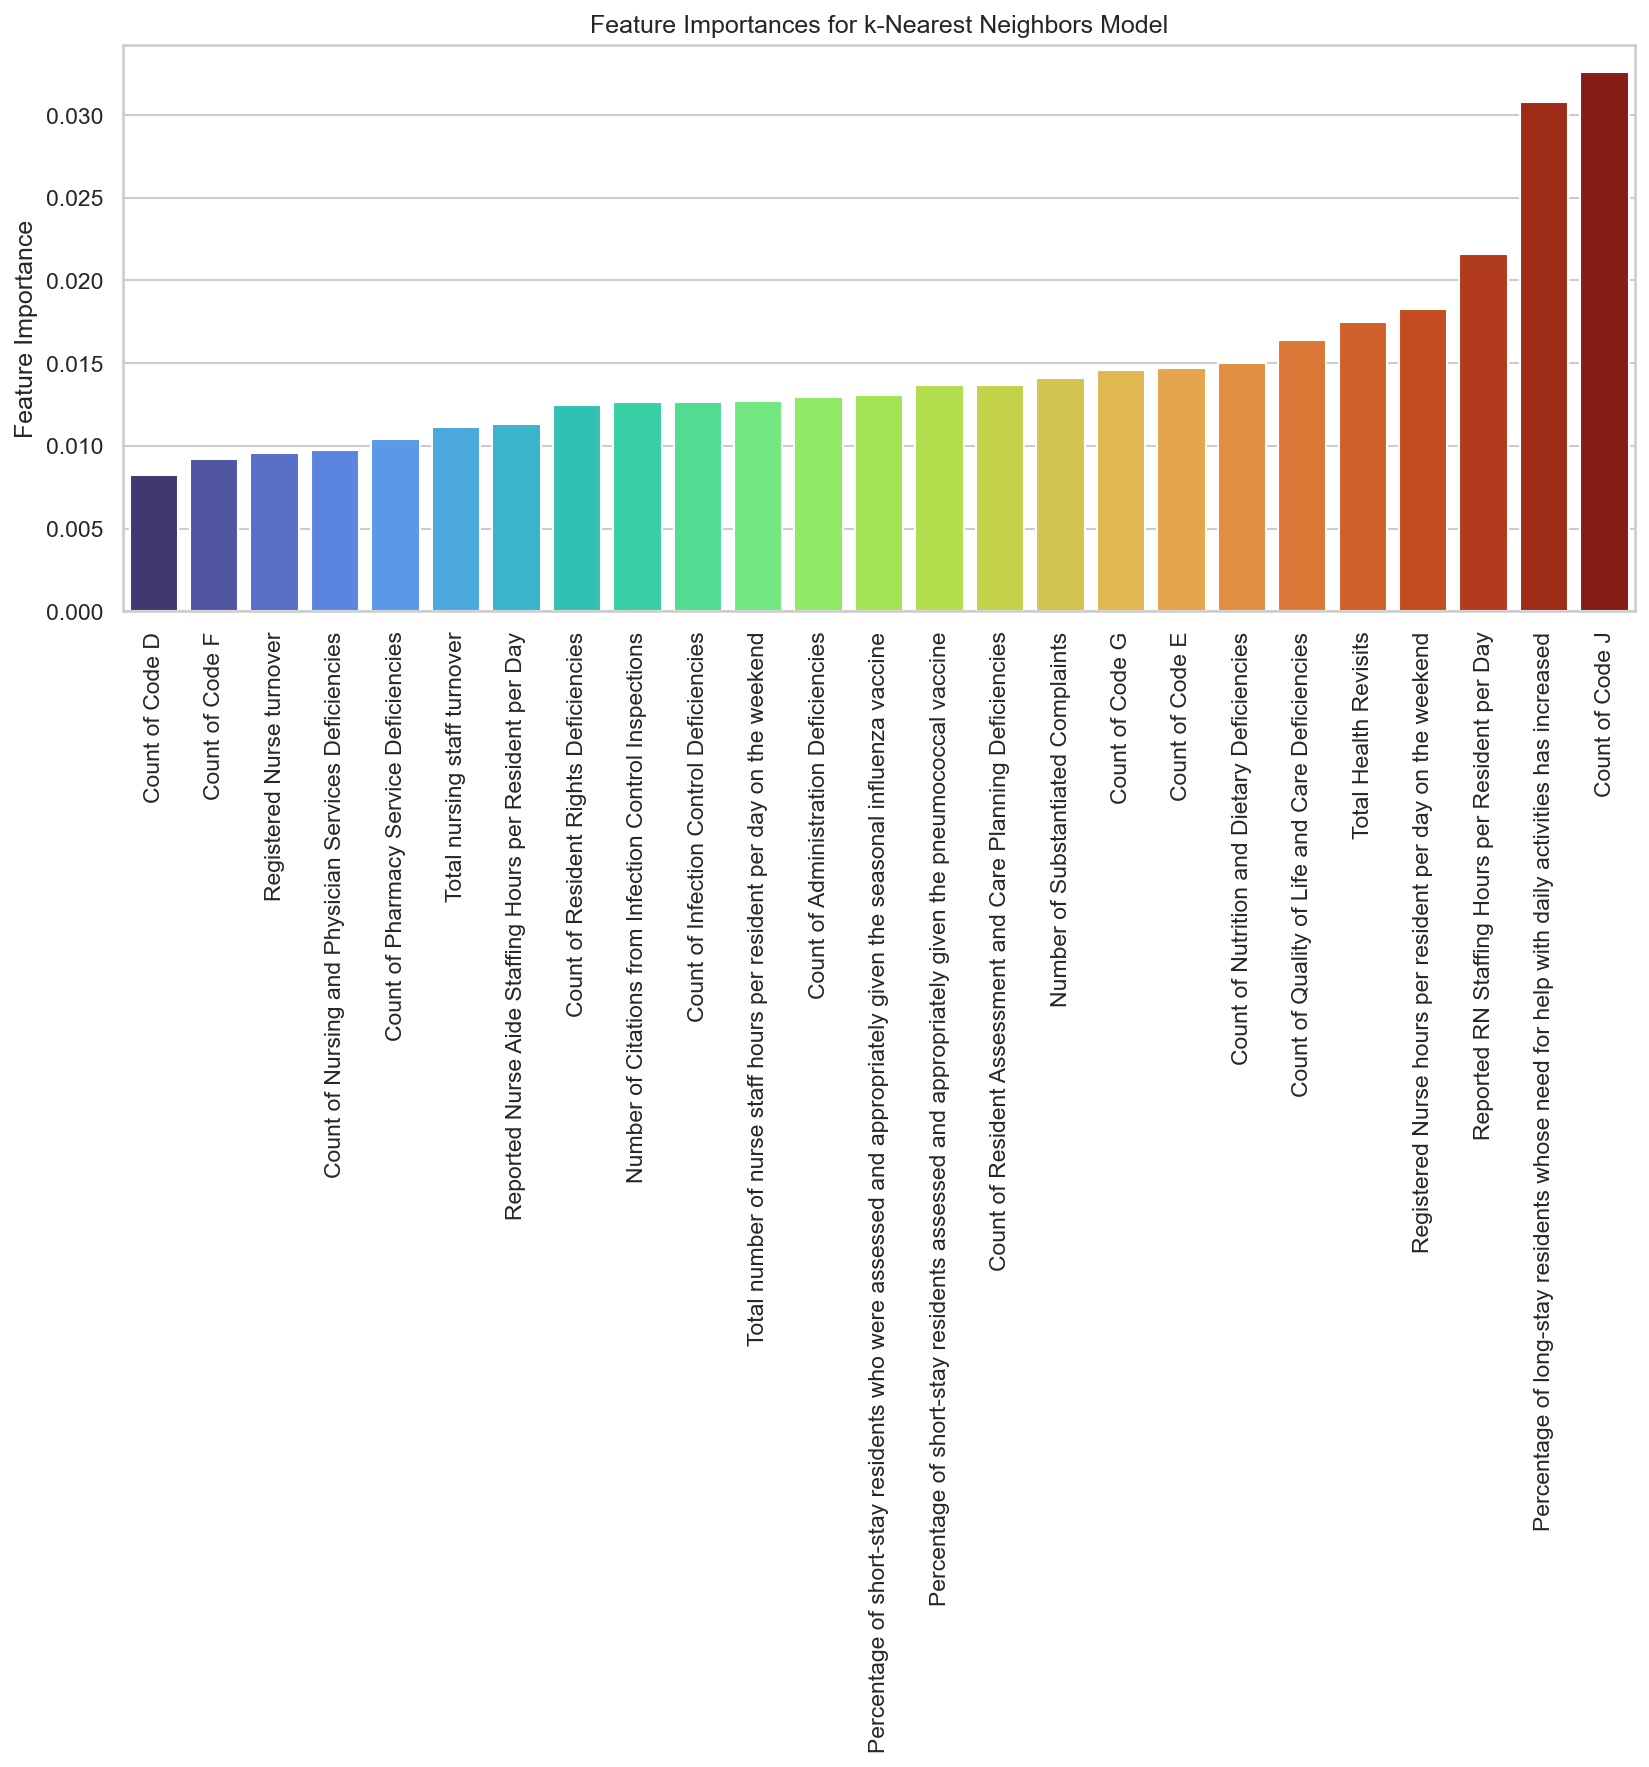

In [169]:
# Plotting the kNN feature importances
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,5),dpi=150)
sns.barplot(data=feats.sort_values('Feature Importance'), x=feats.sort_values('Feature Importance')["Name"], y='Feature Importance', palette="turbo")

plt.xticks(rotation=90);
plt.xlabel("");
plt.title("Feature Importances for k-Nearest Neighbors Model");

From the kNN feature importances, in the top 10, we see that a majority of the features were related to health inspections rating, and thus they were determined to have the most impact on class label predictions for the model.

In [82]:
result_rf.best_estimator_.named_steps["classifier"].feature_importances_

array([0.03906837, 0.03117653, 0.01406958, 0.02972423, 0.02572624,
       0.02501215, 0.01347165, 0.01990324, 0.05998485, 0.05836888,
       0.02838683, 0.01792171, 0.02666121, 0.05470212, 0.07026029,
       0.06282817, 0.06277849, 0.0544446 , 0.05001117, 0.01499364,
       0.04486616, 0.02483498, 0.06626281, 0.05013279, 0.0544093 ])

In [154]:
# Feature importances for the Random Forest model on the 25 selected features
feats = pd.DataFrame(index=feat_names_25, data=result_rf.best_estimator_.named_steps["classifier"].feature_importances_, columns=['Feature Importance'])
feats.sort_values('Feature Importance', ascending=False)

,Feature Importance
Reported RN Staffing Hours per Resident per Day,0.070260
Percentage of long-stay residents whose need for help with daily activities has increased,0.066263
Total number of nurse staff hours per resident per day on the weekend,0.062828
Registered Nurse hours per resident per day on the weekend,0.062778
Count of Code D,0.059985
Count of Code E,0.058369
Reported Nurse Aide Staffing Hours per Resident per Day,0.054702
Total nursing staff turnover,0.054445
Percentage of short-stay residents who were assessed and appropriately given the seasonal influenza vaccine,0.054409
Percentage of short-stay residents assessed and appropriately given the pneumococcal vaccine,0.050133


In [157]:
feats.sort_values("Feature Importance")

,Feature Importance
Count of Administration Deficiencies,0.013472
Count of Nursing and Physician Services Deficiencies,0.014070
Total Health Revisits,0.014994
Count of Code G,0.017922
Count of Infection Control Deficiencies,0.019903
Number of Citations from Infection Control Inspections,0.024835
Count of Pharmacy Service Deficiencies,0.025012
Count of Nutrition and Dietary Deficiencies,0.025726
Count of Code J,0.026661
Count of Code F,0.028387


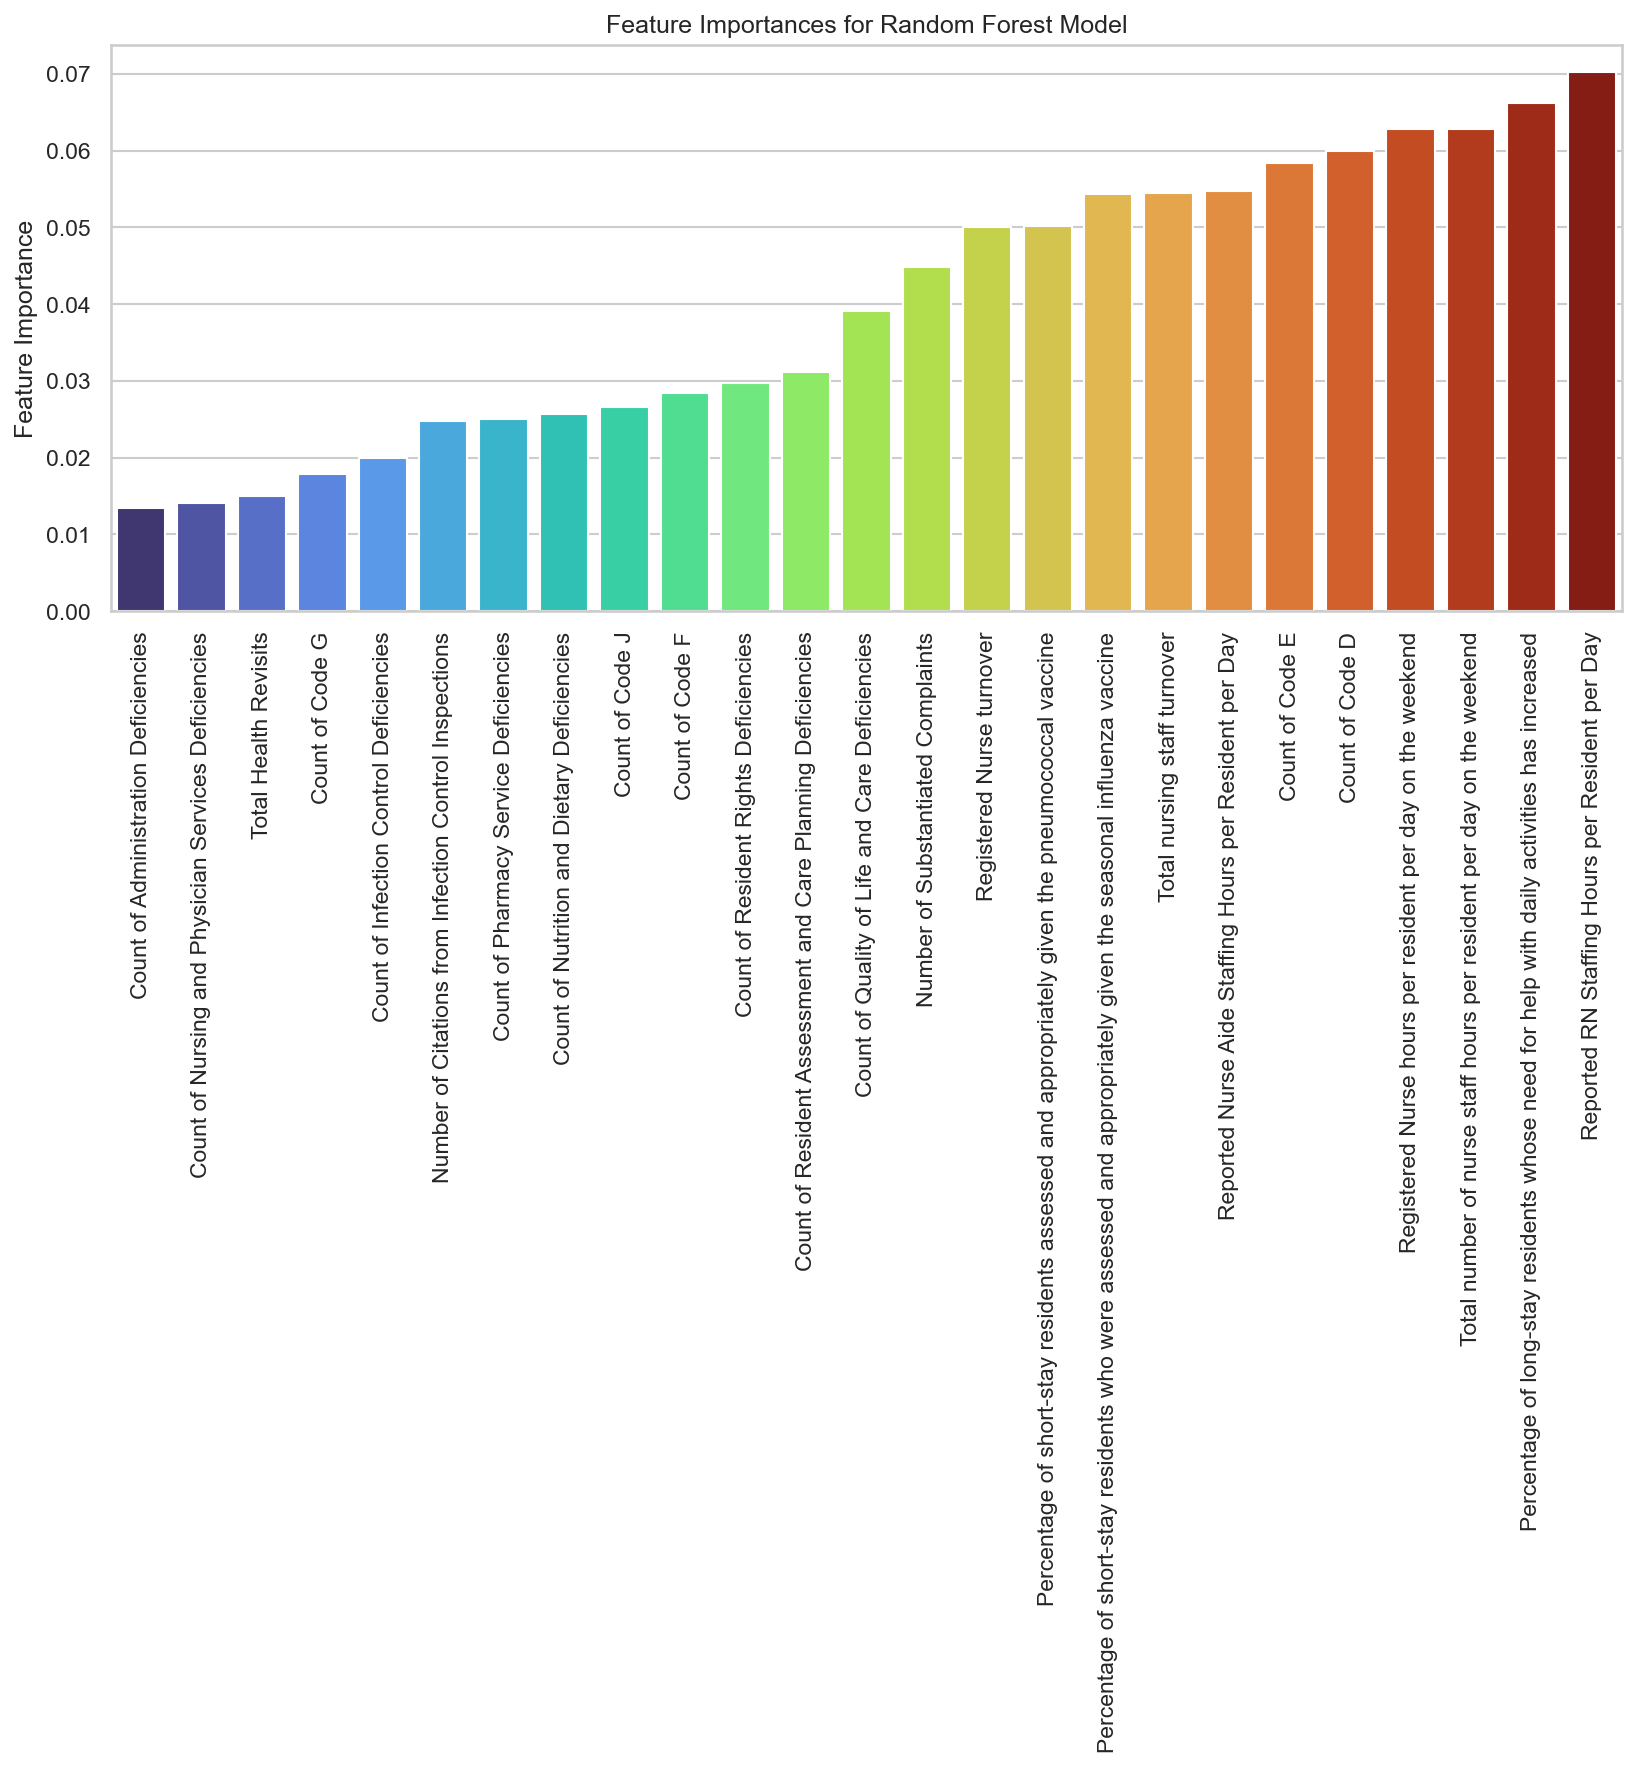

In [158]:
# Plotting the Random Forest feature importances
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,5),dpi=150)
sns.barplot(data=feats.sort_values('Feature Importance'), x=feats.sort_values('Feature Importance').index, y='Feature Importance', palette="turbo")

plt.xticks(rotation=90);
plt.title("Feature Importances for Random Forest Model");

Based on the feature importances for RF, we can see in the top-10 features that staffing-related features are most important when the model is predicting the overall rating of a nursing home.
_______

In [162]:
# Feature importances for the AdaBoost model on the 25 selected features
feats = pd.DataFrame(index=feat_names_25, data=result_ada.best_estimator_.named_steps["classifier"].feature_importances_, columns=['Feature Importance'])
feats.sort_values('Feature Importance', ascending=False)

,Feature Importance
Reported RN Staffing Hours per Resident per Day,0.14
Percentage of long-stay residents whose need for help with daily activities has increased,0.12
Count of Code D,0.08
Count of Code E,0.08
Registered Nurse hours per resident per day on the weekend,0.08
Total number of nurse staff hours per resident per day on the weekend,0.08
Count of Code J,0.06
Total nursing staff turnover,0.06
Number of Citations from Infection Control Inspections,0.04
Registered Nurse turnover,0.04


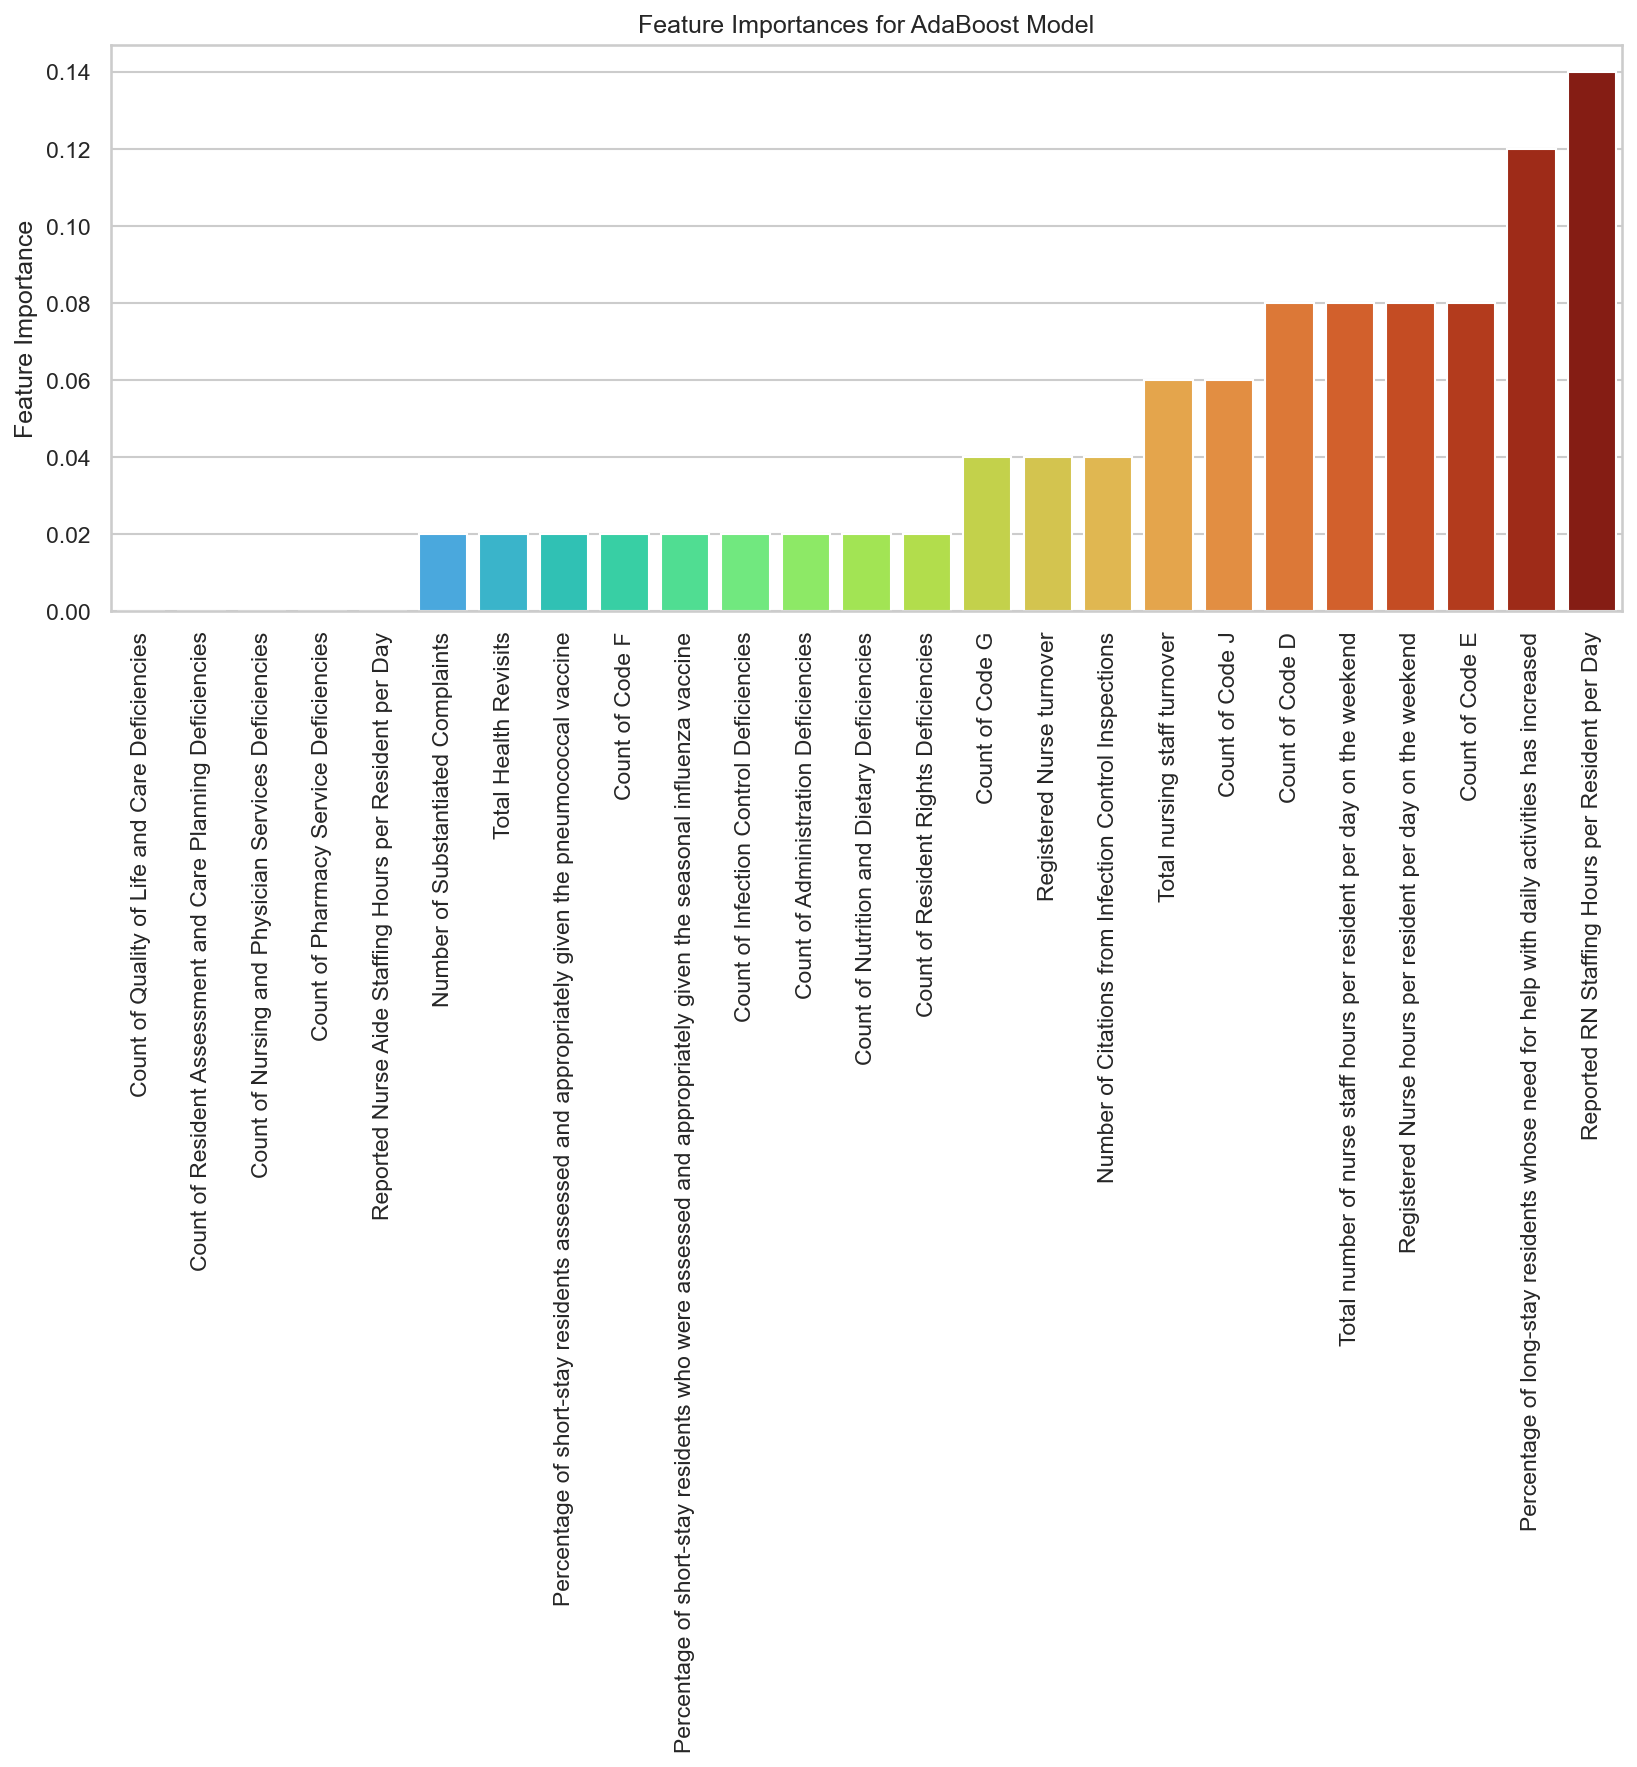

In [163]:
# Plotting the AdaBoost feature importances
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,5),dpi=150)
sns.barplot(data=feats.sort_values('Feature Importance'), x=feats.sort_values('Feature Importance').index, y='Feature Importance', palette="turbo")

plt.xticks(rotation=90);
plt.title("Feature Importances for AdaBoost Model");

From the AdaBoost feature importances, based on the top 10, we see that the features determined to have the most impact (when the model is predicting the class label) were a mix of health inspection-related features and staffing-related features.
_______

(Source: machinelearningmastery): For logistic regression, "These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model."

In [160]:
# Feature importances for the Logistic regression model on the 25 selected features

# Taking the absolute value of the coefficients in order to compare them relative to each other.
feats = pd.DataFrame(index=feat_names_25, data=abs(result_lr.best_estimator_.named_steps["classifier"].coef_[0]), columns=['Feature Importance'])
feats.sort_values('Feature Importance', ascending=False)

,Feature Importance
Count of Code J,1.027342
Reported RN Staffing Hours per Resident per Day,0.758477
Percentage of long-stay residents whose need for help with daily activities has increased,0.576447
Count of Code E,0.423583
Registered Nurse hours per resident per day on the weekend,0.343422
Count of Code F,0.328882
Number of Citations from Infection Control Inspections,0.325980
Total Health Revisits,0.305161
Count of Code G,0.294118
Total number of nurse staff hours per resident per day on the weekend,0.285727


For the LR feature importances, we see that in the top 10, a majority of the features were related to health inspections rating.

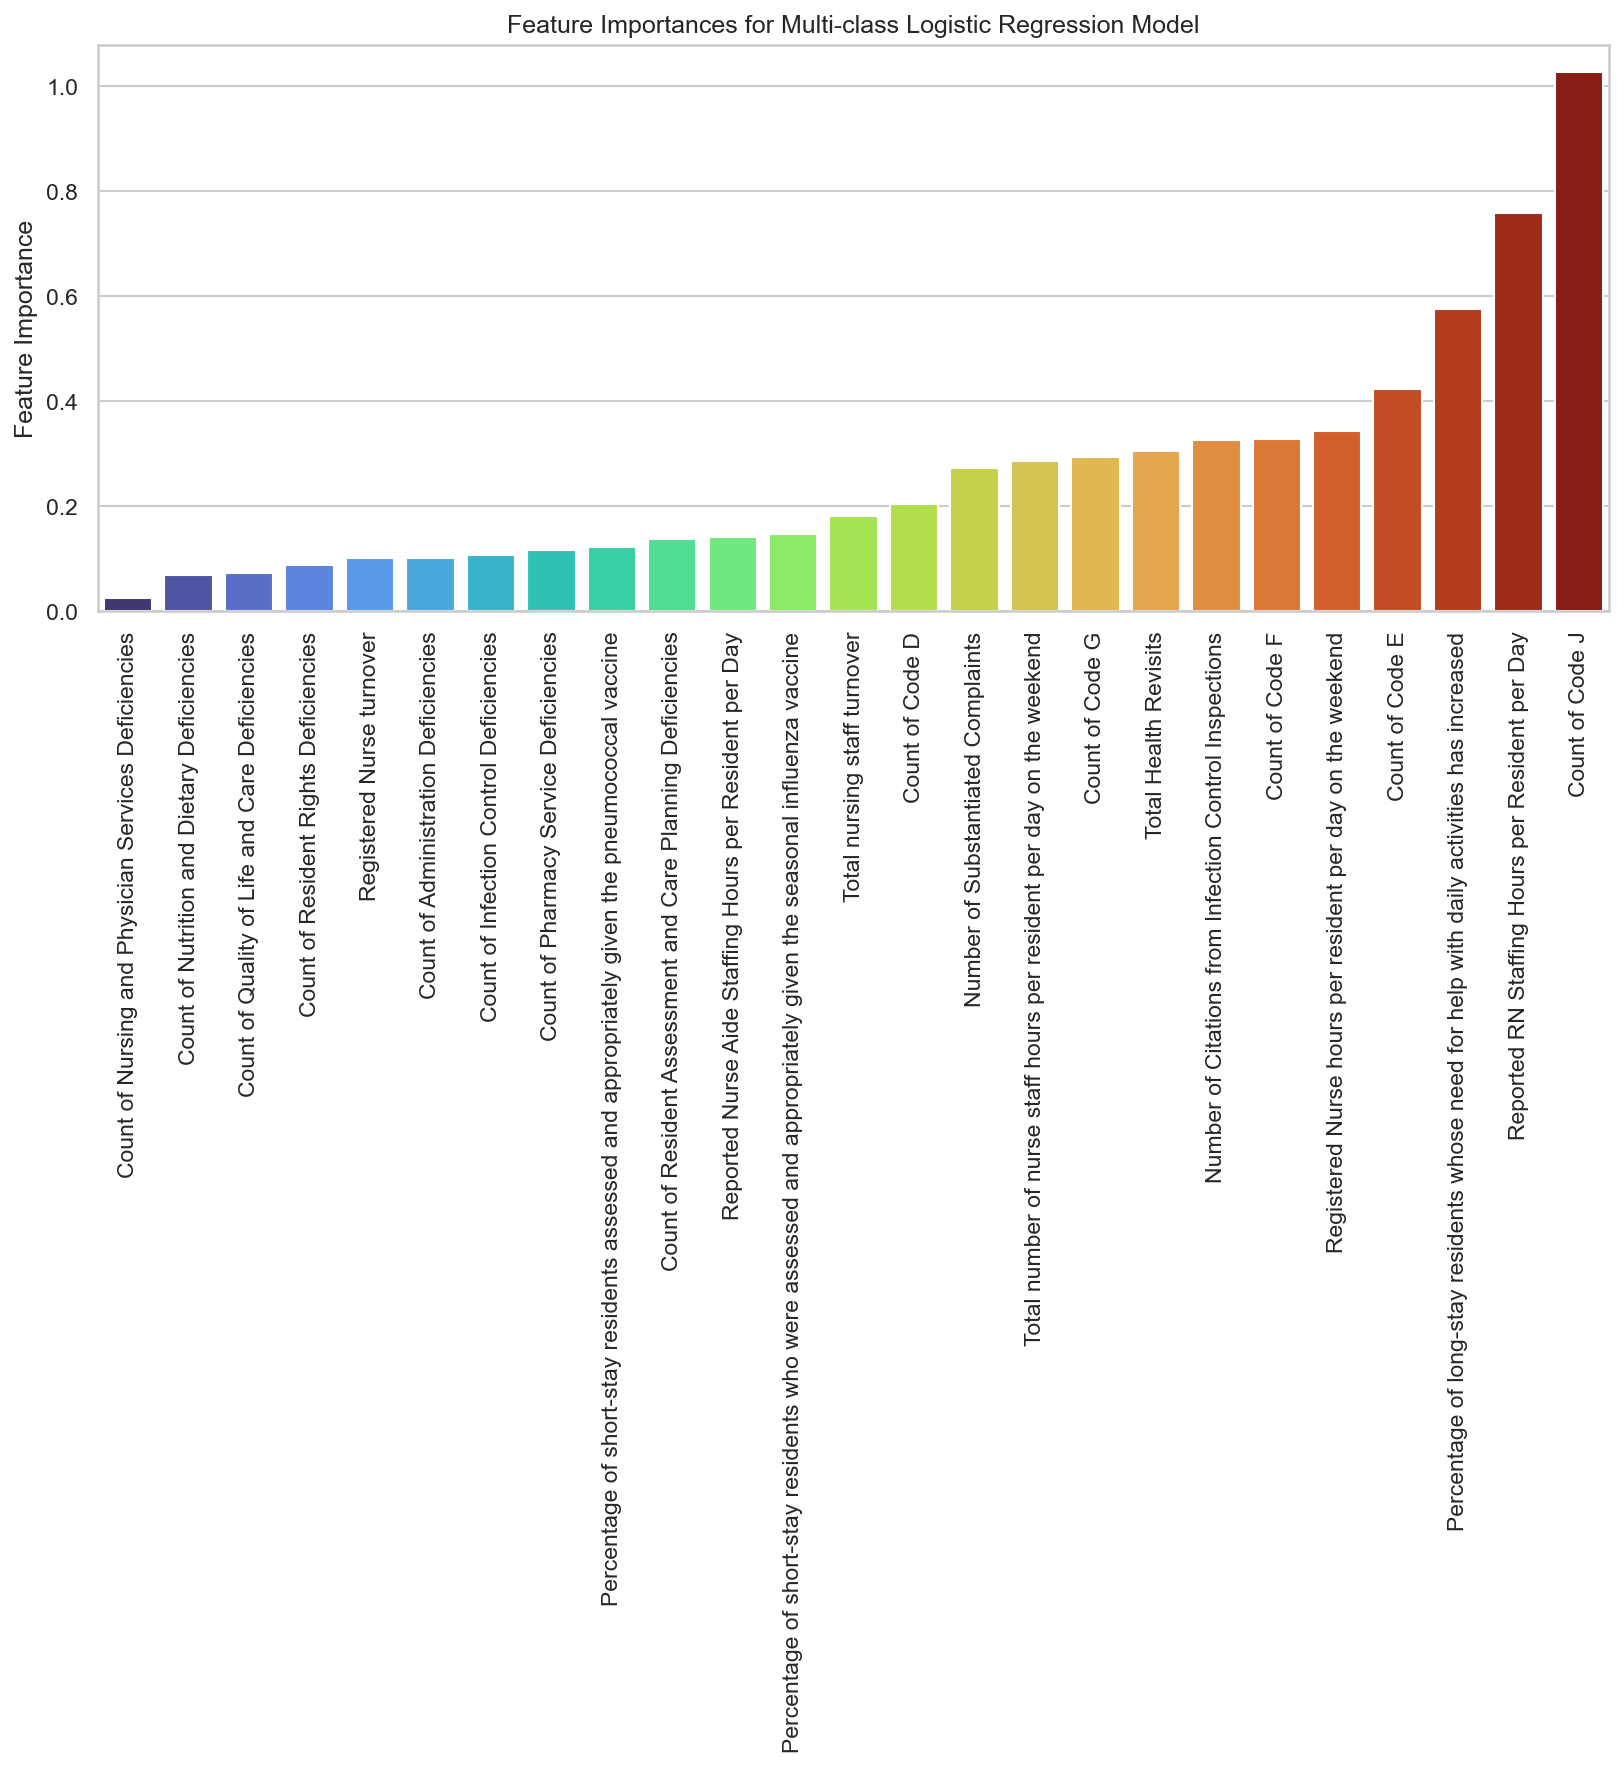

In [161]:
# Plotting the LR feature importances
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,5),dpi=150)
sns.barplot(data=feats.sort_values('Feature Importance'), x=feats.sort_values('Feature Importance').index, y='Feature Importance', palette="turbo")

plt.xticks(rotation=90);
plt.title("Feature Importances for Multi-class Logistic Regression Model");

### Performance evaluation of our best models (Logistic Regression and Random Forest) on the test set
- If we see a huge difference between the training set performance and test set performance, then that means there was overfitting on the data.

In [121]:
# Logistic regression
y_pred_lr = result_lr.predict(X_test)
print(f'Classification accuracy on unseen data: {(accuracy_score(y_test, y_pred_lr)*100)}')

Classification accuracy on unseen data: 47.00805523590334


In [122]:
# Random forest
y_pred_rf = result_rf.predict(X_test)
print(f'Classification accuracy on unseen data: {(accuracy_score(y_test, y_pred_rf)*100)}')

Classification accuracy on unseen data: 46.576524741081705


In [123]:
# We use a confusion matrix in order to better understand how the model performed among the class labels.
# The confusion matrix would help us answer the question: Did the model perform poorer on a certain class?

confusion_matrix(y_test, y_pred_lr)

array([[340, 173,  45,  24,   3],
       [152, 285, 158, 104,  28],
       [ 41, 146, 223, 204,  71],
       [  7,  61, 148, 304, 236],
       [  0,  12,  43, 186, 482]], dtype=int64)

Looking at the main diagonal (above), 1634 instances out of 3476 were **classified correctly** by LR.

In [124]:
confusion_matrix(y_test, y_pred_rf)

array([[350, 164,  49,  20,   2],
       [160, 305, 134, 102,  26],
       [ 42, 197, 195, 187,  64],
       [  8,  66, 157, 311, 214],
       [  3,  16,  62, 184, 458]], dtype=int64)

Looking at the main diagonal (above), 1619 instances out of 3476 were **classified correctly** by RF.

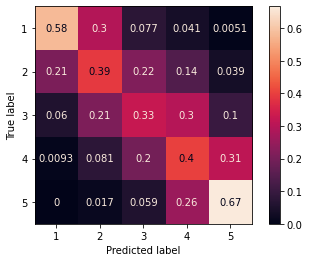

In [125]:
from sklearn.metrics import plot_confusion_matrix
# Confusion matrix showing the classifier's performance on the test data

# Scaled the values so highest value=1
plot_confusion_matrix(result_lr, X_test, y_test, normalize='true', cmap="rocket")
plt.show()

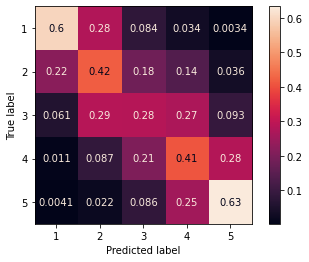

In [126]:
# Scaled the values so highest value=1
plot_confusion_matrix(result_rf, X_test, y_test, normalize='true', cmap="rocket")
plt.show()

From the cofusion matrix plots, we see how some of the misclassified nursing homes with a true overall rating of 2, 3, or 4 often had predicted labels of +/- 1 for the rating. Then, the misclassified nursing homes with a true overall rating of 1 or 5 most often had predicted labels of 2 or 4, respectively.

In [127]:
# View the classification report (Log. Reg.)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.63      0.58      0.60       585
           2       0.42      0.39      0.41       727
           3       0.36      0.33      0.34       685
           4       0.37      0.40      0.39       756
           5       0.59      0.67      0.62       723

    accuracy                           0.47      3476
   macro avg       0.47      0.47      0.47      3476
weighted avg       0.47      0.47      0.47      3476



In [128]:
# View the classification report (Random Forest)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.62      0.60      0.61       585
           2       0.41      0.42      0.41       727
           3       0.33      0.28      0.30       685
           4       0.39      0.41      0.40       756
           5       0.60      0.63      0.62       723

    accuracy                           0.47      3476
   macro avg       0.47      0.47      0.47      3476
weighted avg       0.46      0.47      0.46      3476

